# 서울특별시 한강 및 주요지천 수질 측정 자료
- 데이터 링크 : http://data.seoul.go.kr/dataList/OA-15488/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./서울시 한강 및 주요지천 수질 측정 자료.csv', encoding='cp949')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      3783 non-null   int64  
 1   시간      3783 non-null   object 
 2   측정소명    3783 non-null   object 
 3   수온      3783 non-null   object 
 4   pH      3783 non-null   object 
 5   용존산소    3783 non-null   object 
 6   총질소     3783 non-null   object 
 7   총인      3783 non-null   object 
 8   총유기탄소   3783 non-null   object 
 9   페놀      3783 non-null   float64
 10  시안      3783 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 325.2+ KB


In [5]:
data.isnull().sum()

날짜       0
시간       0
측정소명     0
수온       0
pH       0
용존산소     0
총질소      0
총인       0
총유기탄소    0
페놀       0
시안       0
dtype: int64

# 컬럼 설명
참고 : https://kr.hach.com/
 - pH(수소이온농도지수)
    - 7을 기준으로 낮으면 산성, 높으면 알칼리성
    - 최적의 수돗물 pH는 6.5 ~ 8.5
 
 - 용존산소(DO)
    - 물속에 녹아있는 산소의 양
    - 더러운 물일수록 감소하는 지표이며, 지천의 오염 정도를 말할 수 있다.
    - 용존산소가 4 이상이어야 청정이 유지된다고 할 수 있으며, 어류의 생존에 필요한 최소 용존산소 또한 4 이상이다.


  - 총질소(TN)
   - 수중에 포함되어 모든 형태의 질소의 총합
   - 암모니아, 아질산염, 질산염의 형태로 존재하는 질소는 식물 및 동물에게 필수적인 영양소이다.
   - 하지만, 과도한 질소는 DO의 고갈을 야기할 수 있으며 다양한 경우에서 해로울 수 있다.

  - 총인
    - 수중에 포함되어 있는 모든 형태의 인의 총합
    - 높은 수준의 인은 조류 및 생물의 성장을 크게 가속화 할 수 있으며, 부영양화, 녹조현상으로 이어질 수 있다.
    - 이러한 현상이 지속되면 물고기와 수상생물들이 산소를 빼앗기고,결과적으로 서식지가 파괴될 수 있다.

  - 총유기탄소
    - 수중에 포함되어 있는 유기화합물의 양
    - 유기물은 반드시 독성물질이 아니지만, 물에 높은 농도로 존재하면 생태계에 안좋은 영향을 준다.


In [6]:
data.head()

,날짜,시간,측정소명,수온,pH,용존산소,총질소,총인,총유기탄소,페놀,시안
0,20230120,13:00,탄천,7.7,7.1,12.6,5.500,0.075,3.9,0.0,0.0
1,20230120,13:00,중랑천,5.4,7.2,11.2,4.550,0.125,점검중,0.0,0.0
2,20230120,13:00,안양천,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
3,20230120,13:00,선유,3.8,7.3,15.9,4.140,0.034,2.8,0.0,0.0
4,20230120,13:00,노량진,3.1,7.3,13.8,4.000,0.024,2.2,0.0,0.0


In [9]:
# 최근 한달치의 데이터 존재
data['날짜'].unique()

array([20230120, 20230119, 20230118, 20230117, 20230116, 20230115,
       20230114, 20230113, 20230112, 20230111, 20230110, 20230109,
       20230108, 20230107, 20230106, 20230105, 20230104, 20230103,
       20230102, 20230101, 20221231, 20221230, 20221229, 20221228,
       20221227, 20221226, 20221225, 20221224, 20221223, 20221222,
       20221221, 20221220])

In [10]:
# 시간단위 측정
data['시간'].unique()

array(['13:00', '12:00', '11:00', '10:00', '09:00', '08:00', '07:00',
       '06:00', '05:00', '04:00', '03:00', '02:00', '01:00', '24:00',
       '23:00', '22:00', '21:00', '20:00', '19:00', '18:00', '17:00',
       '16:00', '15:00', '14:00'], dtype=object)

In [11]:
# 탄천, 중랑천, 안양천, 선유, 노량진 5개의 측정소 존재
data['측정소명'].unique()

array(['탄천', '중랑천', '안양천', '선유', '노량진'], dtype=object)

In [13]:
# 수질 점검시 측정 x
data[data['수온'] =='점검중']

,날짜,시간,측정소명,수온,pH,용존산소,총질소,총인,총유기탄소,페놀,시안
2,20230120,13:00,안양천,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
7,20230120,12:00,안양천,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
12,20230120,11:00,안양천,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
119,20230119,14:00,노량진,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
124,20230119,13:00,노량진,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3006,20221226,12:00,안양천,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
3473,20221222,15:00,노량진,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
3478,20221222,14:00,노량진,점검중,점검중,점검중,점검중,점검중,점검중,0.0,0.0
3718,20221220,13:00,탄천,점검중,점검중,점검중,점검중,점검중,3.8,0.0,0.0


In [15]:
# 페놀 및 시안은 모두 0
print(data['페놀'].unique())
print(data['시안'].unique())

[0.]
[0.]


In [118]:
def preprocessing(dataframe):
  df = dataframe.copy()

  col_list = ['수온','pH','용존산소','총질소', '총인', '총유기탄소']

  # 시간 추출
  df['시간'] = df['시간'].map(lambda x: int(x[:2]))

  # 페놀,시안은 모두 0이니 제거
  df = df.drop(['페놀','시안'],axis=1)

  # 점검중인 경우 해당 측정소와 시간의 평균으로 대체
  for col in col_list:
    df[col] = df[col].map(lambda x: np.nan if x == '점검중' else np.float(x))
    df[col].fillna(df.groupby(['측정소명','시간'])[col].transform('mean'),inplace=True)
  return df

df = preprocessing(data)

In [119]:
df.head()

,날짜,시간,측정소명,수온,pH,용존산소,총질소,총인,총유기탄소
0,20230120,13,탄천,7.700000,7.100000,12.600000,5.500000,0.075000,3.900000
1,20230120,13,중랑천,5.400000,7.200000,11.200000,4.550000,0.125000,2.130769
2,20230120,13,안양천,8.286207,7.244828,9.751724,10.547586,0.170862,3.796552
3,20230120,13,선유,3.800000,7.300000,15.900000,4.140000,0.034000,2.800000
4,20230120,13,노량진,3.100000,7.300000,13.800000,4.000000,0.024000,2.200000


# 시각화

- 변수별 평균이 가장 높은 측정소와 가장 낮은 측정소는?

- 시간별 수온, pH, 용존산소, 총질소, 총인, 총유기탄소의 변화는?

- 종합적으로 가장 수질이 좋은 지천과 안좋은 지천은?




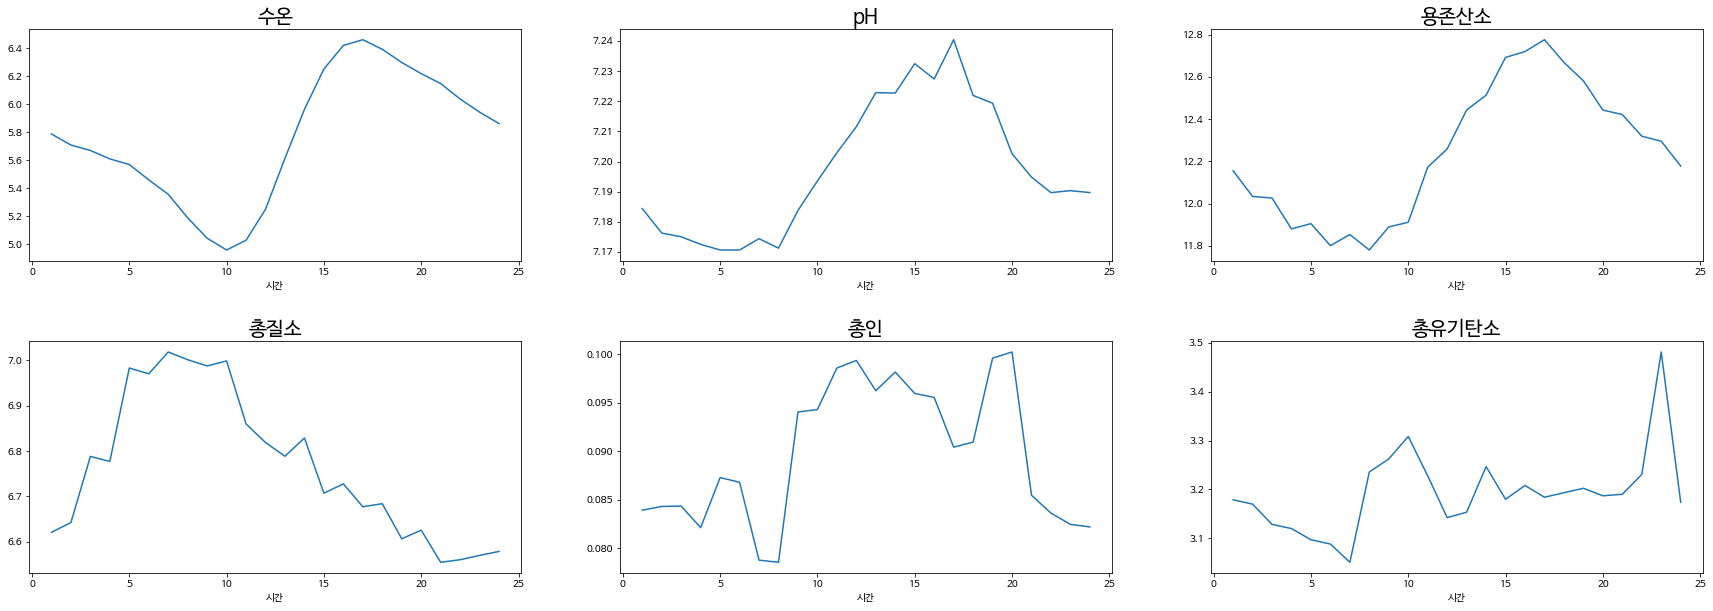

In [120]:
hour_df = pd.DataFrame(df.groupby('시간').mean().iloc[:,1:]).reset_index()

plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=0.35)
for i in range(1,7):
  plt.subplot(2,3,i)
  sns.lineplot(x=hour_df['시간'],y= hour_df[hour_df.columns[i]])
  plt.title(hour_df.columns[i],size=20)
  plt.ylabel('')

- 주요 지천의 수온은 10시이후 점차 증가하여 17시 이후 다시 감소하는 경향을 보인다.
  - 물은 비열이 낮기 때문에 해가 뜬 이후 서서히 증가하는 것으로 생각된다.

- pH, 용존산소, 총인은 수온과 비슷한 그래프를 보이며, 양의 상관관계가 있는 것으로 보인다.

- 총질소는 나머지 변수들과는 반대인 그래프를 보이며, 음의 상관관계가 있는 것으로 보인다.

- 총유기 탄소는 다른 변수들에 비해 변동이 적었지만, 22시 이후 급증하는 것으로 나타났다.

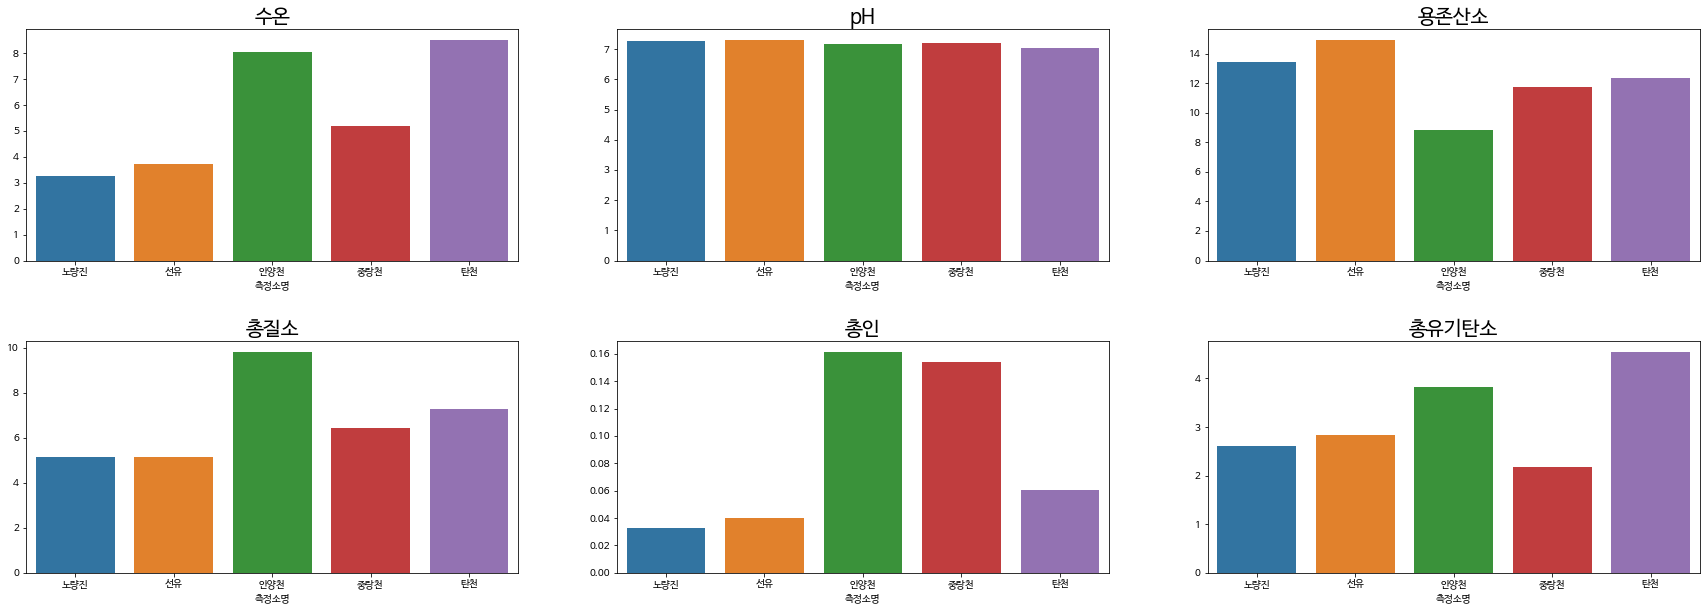

In [121]:
measure_df = pd.DataFrame(df.groupby('측정소명').mean().iloc[:,1:]).reset_index()
measure_df = measure_df.drop('시간',axis=1)

plt.figure(figsize=(30,10))
plt.subplots_adjust(hspace=0.35)

for i in range(1,7):
  plt.subplot(2,3,i)
  sns.barplot(x=measure_df['측정소명'],y= measure_df[measure_df.columns[i]])
  plt.title(measure_df.columns[i],size=20)
  plt.ylabel('')

- 탄천의 수온이 평균 8을 넘으며 가장 높았고, 안양천이 약 8도의 수온을 가지며 2위로 나타났다.

- pH는 모든 지천이 약 7로 비슷하게 나타났다.

- 용존산소는 안양천이 가장 낮게 나타났으며, 선유천이 가장 높았다.

- 총질소는 안양천이 약 10으로 다른 하천들에 비해 높게 나타났다.

- 총인은 안양천, 중랑천이 약 0.16가까이 나타나며 1,2위를 차지했다.

- 총유기탄소는 탄천이 가장 높았으며, 안양천이 그 뒤를 이었다.

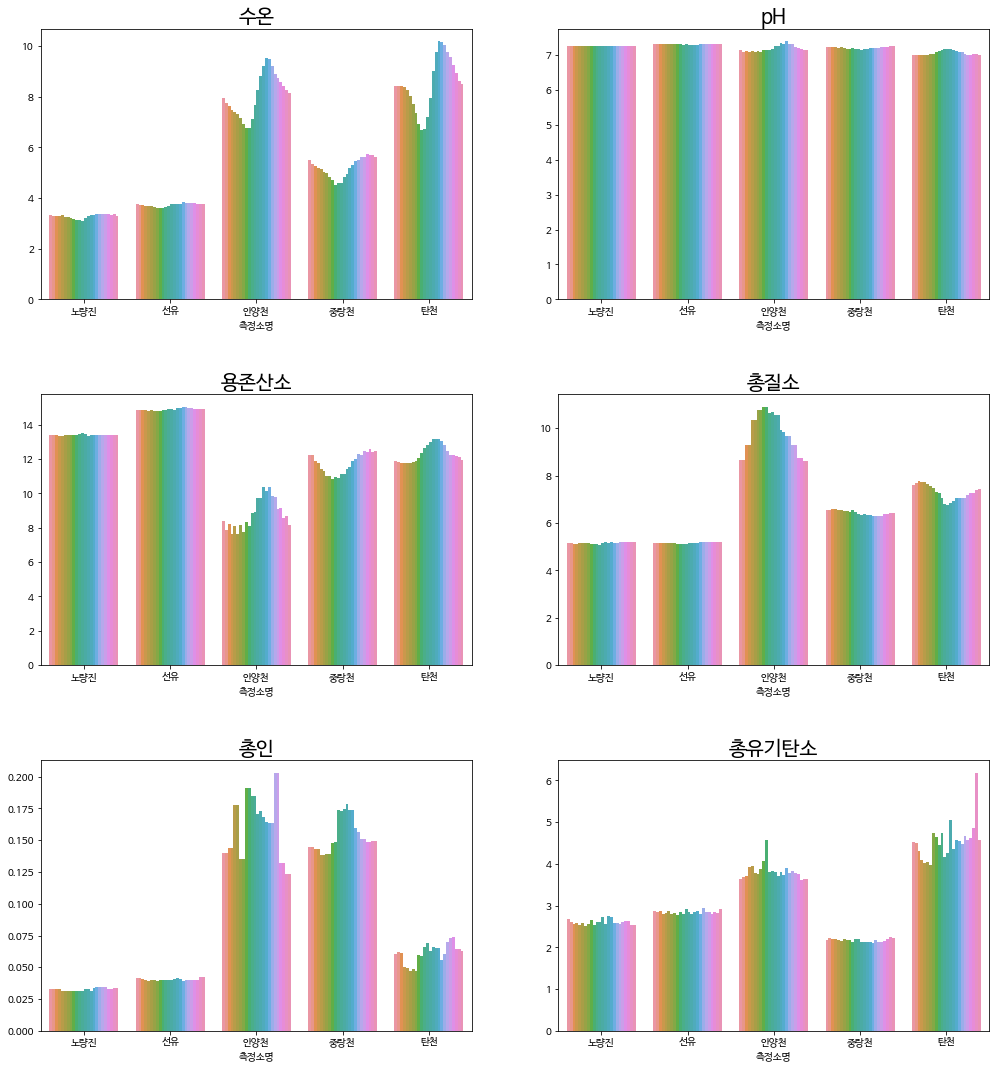

In [122]:
measure_df = pd.DataFrame(df.groupby(['시간','측정소명']).mean().iloc[:,1:]).reset_index()

plt.figure(figsize=(17,10))

for i in range(2,8):
  plt.subplot(4,2,i-1)
  sns.barplot(x=measure_df['측정소명'],y= measure_df[measure_df.columns[i]],hue=measure_df['시간']).legend_.remove()
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
  plt.title(measure_df.columns[i],size=20)
  plt.ylabel('')

- 측정소마다 시간별로 측정한 결과 안양천과 탄천에서 유독 변동이 큰 것을 볼 수 있다.

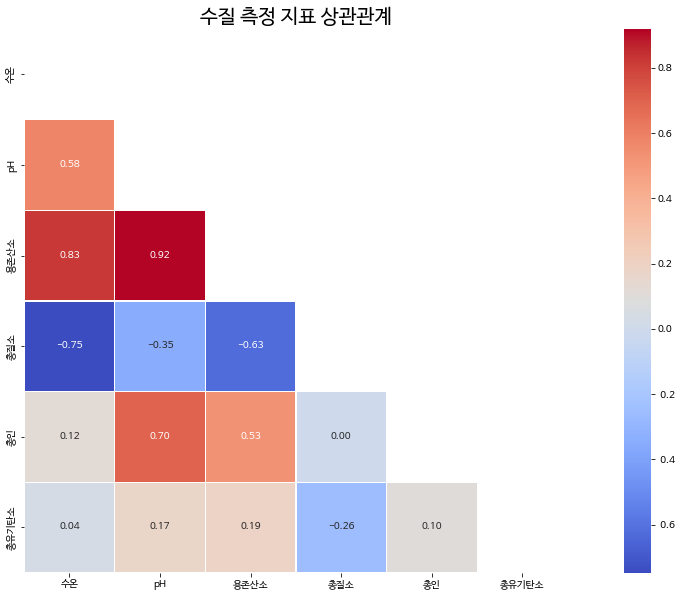

In [154]:
corr = df.groupby('시간').mean().iloc[:,1:].corr()

plt.figure(figsize=(20,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='coolwarm',linewidth=0.05,square=True,mask=mask,annot=True,fmt='.2f')
plt.title('수질 측정 지표 상관관계',size=20)
plt.show()

- 수온은 용존산소와 강한 양의 상관관계를 띄고 있으며, pH와는 약한 양의 상관관계를 가지고 있다. 이와 반대로 총질소와는 강한 음의 상관관계를 보인다.

- pH는 용존산소와 강한 양의 상관관계를 보이고 있으며, 총인과 약한 양의 상관관계를 보인다.

- 용존산소는 총인과 약한 양의 상관관계를 보이며, 총질소와 약한 음의 상관관계를 보인다.

# 시각화 결과

- 변수별 평균이 가장 높은 측정소와 가장 낮은 측정소는?
 - 수온,총인,총질소에서 안양천이 가장 높았으며, 노량진이 가장 낮았다.
 - 용존산소에서는 선유에서 가장 높게 나타났고, 안양천에서 가장 낮았다. 

- 시간별 수온, pH, 용존산소, 총질소, 총인, 총유기탄소의 변화는?
  - 해가 떠 있는 시간에서 수온이 서서히 오르고 있고, 이에 맞춰 pH, 용존산소, 총인이 오른다.
  - 총 질소는 위의 변수들과 반대로 나타나는 경향이 있다.

- 종합적으로 가장 수질이 좋은 지천과 안좋은 지천은?
  - 가장 수질이 좋은 지천은 선유로, 용존 산소 함유량이 가장 높았으며, 총질소와 총인이 매우 낮게 나타났기에 가장 수질이 좋다고 판단된다.
  - 이에 비해 수질이 좋지 않은 지천은 안양천으로, 다른 지천들에 비해 수온이 높고, 총질소가 높았으며, 용존 산소 함유량이 낮았다.


